## Requirements

* python-igraph
* set directory in the next cell

In [1]:
datadir = '../Datasets/'

In [2]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [3]:
## define colors and node sizes here
cls_edges = 'gainsboro'
cls = ['silver','dimgray','black']
sz = [6,9,12]

In [4]:
## To produce LaTeX from a DataFrame
#df = df.round(decimals=3)
#print(df.to_latex(index=False))
#print(df.to_latex(index=True))

In [5]:
## read edges and build weighted directed graph
D = pd.read_csv(datadir+'MRP/Cit_Phy.csv', names = ['from', 'to'], header=1)
g = ig.Graph.TupleList([tuple(x) for x in D.values], directed=True)
print(g.vcount(),'nodes and',g.ecount(),'directed edges')
D.head()

27770 nodes and 352806 directed edges


,from,to
0,1001,9308122
1,1001,9309097
2,1001,9311042
3,1001,9401139
4,1001,9404151


In [6]:
# number of weak connections
n = 0
weak_clus = {}
cl = g.clusters(mode='WEAK').membership
for i in range(g.vcount()):
    if cl[i]>0:
        weak_clus['id'] = i
        weak_clus['rel'] = g.vs[i]
        n += 1
print(n)        

370


In [7]:
max(g.coreness())

37

In [9]:
g.maxdegree()

2468

In [10]:
g.is_connected()

False

In [11]:
## directed degree centrality
def degree_centrality(g, weights=None):
    n = g.vcount()
    if g.is_directed():
        dc = [sum(x)/(2*(n-1)) for x in zip(g.strength(mode='in',weights=weights),\
              g.strength(mode='out',weights=weights))]
    else:
        dc = [x/(n-1) for x in g.strength(weights=weights)]
    return dc

In [12]:
dic_deg = []

for i,v in enumerate(g.vs):  
    deg = {}
    #print(v['name'])
    deg['node'] = v['name']
    deg['total_degree'] = g.degree(i)
    deg['in_degree'] = g.indegree(i)
    deg['out_degree'] = g.outdegree(i)
    dic_deg.append(deg)
len(dic_deg)

27770

## Warning for disconnected graphs

In the code below, we get a warning when running closeness centrality, since the graph is not connected.
Here are the details from the help file:

''If the graph is not connected, and there is no path between two
vertices, the number of vertices is used instead the length of
the geodesic. This is always longer than the longest possible
geodesic.''

In [13]:
deg_df = pd.DataFrame(dic_deg)
deg_df['degree'] = degree_centrality(g)
deg_df['pagerank'] = g.pagerank()
deg_df['authority'] = g.authority_score()
deg_df['hub'] = g.hub_score()
deg_df['between'] = g.betweenness()

# Normalizing betweenness
n = g.vcount()
deg_df['between'] = [2*x/((n-1)*(n-2)) for x in deg_df['between']]

deg_df['closeness'] = g.closeness()
deg_df.head(20)

C:\Users\naahi\anaconda4\envs\graphmining\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph-jst2e\vendor\build\igraph\igraph-0.9.0-pre+0afacadd-msvc\src\centrality.c:2856
  if sys.path[0] == '':


,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,closeness
0,1001,92,10,82,0.001657,0.000013,0.004686,0.138039,1.139029e-04,0.002679
1,9308122,122,115,7,0.002197,0.000252,0.017758,0.003071,1.592477e-05,0.002677
2,9309097,144,140,4,0.002593,0.001069,0.018901,0.002701,3.022334e-05,0.002678
3,9311042,57,55,2,0.001026,0.000145,0.009082,0.002460,9.570998e-07,0.002677
4,9401139,461,421,40,0.008301,0.002196,0.078898,0.011973,1.618310e-03,0.002681
5,9404151,79,77,2,0.001422,0.000462,0.017890,0.001815,3.206859e-05,0.002677
6,9407087,1308,1299,9,0.023551,0.006084,0.180561,0.011242,6.697507e-04,0.002683
7,9408099,1013,1006,7,0.018240,0.003125,0.146579,0.016458,1.030103e-04,0.002682
8,9501030,153,126,27,0.002755,0.001119,0.032308,0.056124,3.708565e-04,0.002679
9,9503124,1124,1114,10,0.020238,0.004469,0.261842,0.025630,8.354892e-04,0.002682


In [14]:
# Sorting based on total degree
deg_total = deg_df.sort_values(by="total_degree",ascending=False)
deg_total.head(20)

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,closeness
559,9711200,2468,2414,54,0.044438,0.003368,1.000000,0.148049,0.013884,0.002683
719,9802150,1797,1775,22,0.032356,0.002229,0.836583,0.125955,0.003545,0.002682
718,9802109,1653,1641,12,0.029763,0.002045,0.798082,0.116833,0.003143,0.002682
811,9905111,1369,807,562,0.024650,0.000894,0.309304,1.000000,0.214474,0.002683
6,9407087,1308,1299,9,0.023551,0.006084,0.180561,0.011242,0.000670,0.002683
589,9908142,1219,1144,75,0.021949,0.001397,0.138153,0.118987,0.018581,0.002681
469,9610043,1218,1199,19,0.021931,0.002665,0.270093,0.097779,0.001052,0.002683
250,9510017,1165,1155,10,0.020977,0.004210,0.290993,0.041243,0.000316,0.002683
9,9503124,1124,1114,10,0.020238,0.004469,0.261842,0.025630,0.000835,0.002682
611,9906064,1038,1032,6,0.018690,0.001741,0.163821,0.080031,0.024035,0.002680


In [15]:
#Sorting based on degree centrality measure
deg_degree = deg_df.sort_values(by="degree",ascending=False)
deg_degree.head(20)

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,closeness
559,9711200,2468,2414,54,0.044438,0.003368,1.000000,0.148049,0.013884,0.002683
719,9802150,1797,1775,22,0.032356,0.002229,0.836583,0.125955,0.003545,0.002682
718,9802109,1653,1641,12,0.029763,0.002045,0.798082,0.116833,0.003143,0.002682
811,9905111,1369,807,562,0.024650,0.000894,0.309304,1.000000,0.214474,0.002683
6,9407087,1308,1299,9,0.023551,0.006084,0.180561,0.011242,0.000670,0.002683
589,9908142,1219,1144,75,0.021949,0.001397,0.138153,0.118987,0.018581,0.002681
469,9610043,1218,1199,19,0.021931,0.002665,0.270093,0.097779,0.001052,0.002683
250,9510017,1165,1155,10,0.020977,0.004210,0.290993,0.041243,0.000316,0.002683
9,9503124,1124,1114,10,0.020238,0.004469,0.261842,0.025630,0.000835,0.002682
611,9906064,1038,1032,6,0.018690,0.001741,0.163821,0.080031,0.024035,0.002680


In [16]:
# Sorting based on pagerank centrality measure
deg_pagerank = deg_df.sort_values(by="pagerank",ascending=False)
deg_pagerank.head(20)

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,closeness
109,9207016,220,219,1,0.003961,0.006229,0.034737,0.000009,0.000014,0.002679
6,9407087,1308,1299,9,0.023551,0.006084,0.180561,0.011242,0.000670,0.002683
92,9201015,15,14,1,0.000270,0.005638,0.000157,0.002005,0.000001,0.002675
9,9503124,1124,1114,10,0.020238,0.004469,0.261842,0.025630,0.000835,0.002682
250,9510017,1165,1155,10,0.020977,0.004210,0.290993,0.041243,0.000316,0.002683
132,9402044,257,257,0,0.004627,0.003821,0.025466,0.000000,0.000000,0.002679
559,9711200,2468,2414,54,0.044438,0.003368,1.000000,0.148049,0.013884,0.002683
155,9410167,773,748,25,0.013918,0.003290,0.183969,0.029941,0.000596,0.002682
7,9408099,1013,1006,7,0.018240,0.003125,0.146579,0.016458,0.000103,0.002682
130,9402002,296,282,14,0.005330,0.002895,0.049352,0.010023,0.000117,0.002680


In [17]:
# Sorting based on authority centrality measure
deg_authority = deg_df.sort_values(by="authority",ascending=False)
deg_authority.head(20)

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,closeness
559,9711200,2468,2414,54,0.044438,0.003368,1.000000,0.148049,0.013884,0.002683
719,9802150,1797,1775,22,0.032356,0.002229,0.836583,0.125955,0.003545,0.002682
718,9802109,1653,1641,12,0.029763,0.002045,0.798082,0.116833,0.003143,0.002682
811,9905111,1369,807,562,0.024650,0.000894,0.309304,1.000000,0.214474,0.002683
250,9510017,1165,1155,10,0.020977,0.004210,0.290993,0.041243,0.000316,0.002683
469,9610043,1218,1199,19,0.021931,0.002665,0.270093,0.097779,0.001052,0.002683
9,9503124,1124,1114,10,0.020238,0.004469,0.261842,0.025630,0.000835,0.002682
765,9803131,533,475,58,0.009597,0.000529,0.221580,0.325841,0.007588,0.002680
246,9510135,790,775,15,0.014224,0.002490,0.199366,0.078694,0.000564,0.002682
155,9410167,773,748,25,0.013918,0.003290,0.183969,0.029941,0.000596,0.002682


In [18]:
# Sorting based on hub centrality measure
deg_hub = deg_df.sort_values(by="hub",ascending=False)
deg_hub.head(20)

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,closeness
811,9905111,1369,807,562,0.024650,0.000894,3.093038e-01,1.000000,0.214474,0.002683
18608,110055,307,5,302,0.005528,0.000014,6.931399e-04,0.615348,0.000855,0.002682
12861,7170,341,78,263,0.006140,0.000048,2.301711e-02,0.558720,0.003547,0.002682
15544,101126,334,60,274,0.006014,0.000043,1.174096e-02,0.534498,0.003608,0.002681
22254,210157,293,4,289,0.005276,0.000012,2.580437e-04,0.525746,0.000099,0.002681
7399,9811019,101,4,97,0.001819,0.000017,5.867735e-04,0.517400,0.000929,0.002680
1487,9806199,247,88,159,0.004447,0.000109,2.768115e-02,0.493783,0.005042,0.002681
4125,9912164,161,27,134,0.002899,0.000021,1.257340e-02,0.492487,0.000974,0.002680
1589,9710046,431,72,359,0.007760,0.000057,2.649578e-02,0.487251,0.003516,0.002681
1621,9802051,294,87,207,0.005294,0.000086,2.713238e-02,0.466877,0.004639,0.002681


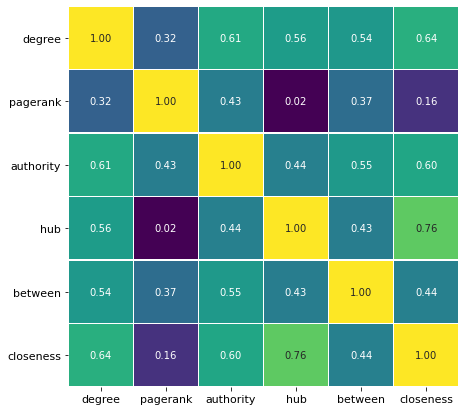

In [24]:
# Finding the correlation between the centrality measures
deg_corr = deg_df[['degree', 'pagerank', 'authority', 'hub', 'between', 'closeness']]

# Kendall's correlation
f,ax = plt.subplots(figsize=(7, 7))

sns.heatmap(deg_corr.corr('kendall'), cmap='viridis', annot=True, linewidths=.5, fmt= '.2f', cbar=False, ax=ax)
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11,rotation=0)
plt.show()

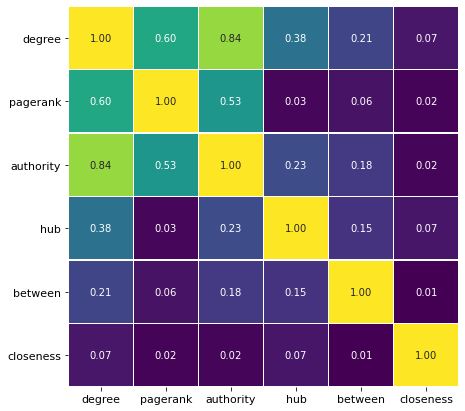

In [23]:
# Pearson's correlation
f,ax = plt.subplots(figsize=(7, 7))

sns.heatmap(deg_corr.corr('pearson'), cmap='viridis', annot=True, linewidths=.5, fmt= '.2f', cbar=False, ax=ax)
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11,rotation=0)
plt.show()

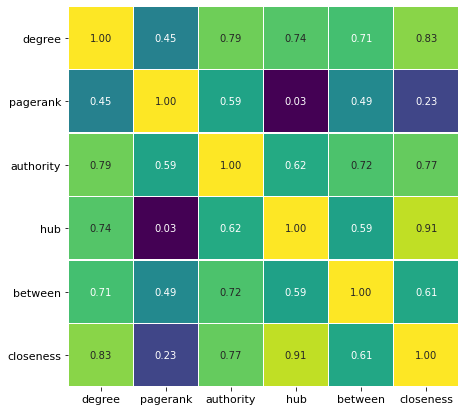

In [22]:
# Spearman's correlation
f,ax = plt.subplots(figsize=(7, 7))

sns.heatmap(deg_corr.corr('spearman'), cmap='viridis', annot=True, linewidths=.5, fmt= '.2f', cbar=False, ax=ax)
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11,rotation=0)
plt.show()